In [2]:
import numpy as np
import pandas as pd
from astropy.io import ascii
import os
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%run -i /Users/marie/Documents/Research/dataproc/tools/cluster_tools.py

In [34]:
data = pd.read_csv('Catalogues/NGC5822_6.csv')
data

RA_ICRS    DE_ICRS               Source     Plx   pmRA   pmDE  \
0     226.540815 -56.317269  5880538895205342848  1.2212 -7.561 -3.855   
1     226.486014 -56.259646  5880539999013530240  1.3248 -6.493 -4.649   
2     226.948946 -56.298907  5880548657675042688  1.2709 -7.299 -4.039   
3     227.291515 -56.203286  5880553017058278656  1.2268 -6.955 -4.249   
4     227.336485 -56.170772  5880553193167640576  1.2236 -6.473 -6.232   
...          ...        ...                  ...     ...    ...    ...   
6353  226.740458 -52.452474  5900298807075763712  1.3281 -5.750 -4.136   
6354  226.453067 -52.509047  5900300456342555520  1.1632 -8.663 -3.604   
6355  226.449560 -52.506863  5900300456374222720  1.3185 -5.452 -3.848   
6356  226.466252 -52.457901  5900300662501540096  1.2761 -5.790 -4.014   
6357  226.373067 -52.436754  5900301624572600320  1.1496 -7.222 -3.577   

      Solved  nueff   pscol   RUWE       Gmag      BPmag      RPmag     BP-RP  \
0         95    NaN  1.2681  1.020  20.414282  21.562517  19.130104  2.432413   
1         95    NaN  1.2593  1.095  20.303038  21.424482  18.701237  2.723246   
2         95    NaN  1.3149  1.015  20.301525  21.490753  19.159494  2.331259   
3         95    NaN  1.3698  1.040  19.986824  21.398617  18.599062  2.799555   
4         31  1.537     NaN  1.060  13.967035  14.326902  13.421547  0.905355   
...      ...    ...     ...    ...        ...        ...        ...       ...   
6353      95    NaN  1.3074  0.989  20.389110  21.277702  19.652750  1.624952   
6354      95    NaN  1.4698  0.962  20.393826  21.527254  19.700907  1.826347   
6355      95    NaN  1.2504  1.021  20.196398  20.947050  19.314562  1.632488   
6356      95    NaN  1.6429  0.985  20.559767  21.270952  19.234112  2.036840   
6357      95    NaN  1.3544  0.931  20.106510  20.964010  19.360294  1.603716   

         RV       ELAT     RAJ2000    DEJ2000  Plx_corr  
0       NaN -37.108574  226.540876 -56.317251  1.178051  
1       NaN -37.064888  226.486066 -56.259625  1.279951  
2       NaN -37.013984  226.949004 -56.298889  1.243095  
3       NaN -36.859565  227.291570 -56.203267  1.212646  
4    -21.07 -36.820520  227.336537 -56.170745  1.264165  
...     ...        ...         ...        ...       ...  
6353    NaN -33.427750  226.740500 -52.452456  1.301355  
6354    NaN -33.538558  226.453130 -52.509031  1.172742  
6355    NaN -33.537197  226.449600 -52.506846  1.275855  
6356    NaN -33.487614  226.466295 -52.457883  1.321704  
6357    NaN -33.486316  226.373119 -52.436738  1.133663  

[6358 rows x 19 columns]

/opt/anaconda3/envs/analysis-env/lib/python3.12/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


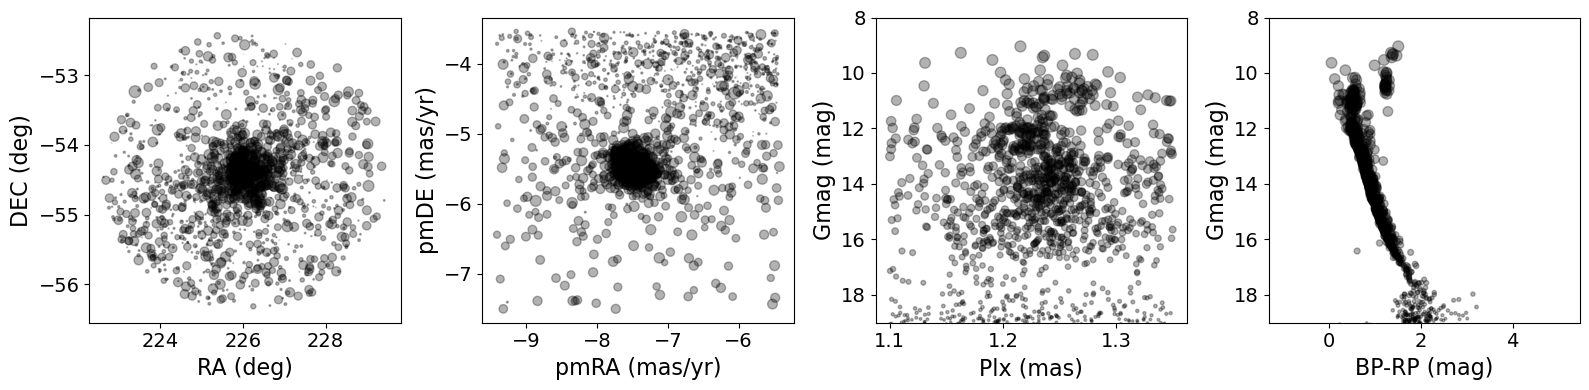

In [5]:
fig,ax = plt.subplots(1,4, figsize=(16,4),tight_layout=True)
pop = data
ax[0].scatter(pop.RAJ2000, pop.DEJ2000, color='k', s=(19.5-pop.Gmag)*6, alpha=0.3)
ax[0].set_xlabel("RA (deg)",fontsize=16)
ax[0].set_ylabel("DEC (deg)",fontsize=16)
ax[1].scatter(pop.pmRA, pop.pmDE, color='k', s=(19.5-pop.Gmag)*6, alpha=0.3)
ax[1].set_xlabel("pmRA (mas/yr)",fontsize=16)
ax[1].set_ylabel("pmDE (mas/yr)",fontsize=16)
ax[2].scatter(pop.Plx_corr, pop.Gmag, color='k', s=(19.5-pop.Gmag)*6, alpha=0.3)
ax[2].set_ylim(19,8)
ax[2].set_xlabel("Plx (mas)",fontsize=16)
ax[2].set_ylabel("Gmag (mag)",fontsize=16)
ax[3].scatter(pop["BP-RP"], pop.Gmag, color='k', s=(19.5-pop.Gmag)*6, alpha=0.3)
ax[3].set_ylim(19,8)
ax[3].set_xlabel("BP-RP (mag)",fontsize=16)
ax[3].set_ylabel("Gmag (mag)",fontsize=16)

ax[0].tick_params(labelsize=14)
ax[1].tick_params(labelsize=14)
ax[2].tick_params(labelsize=14)
ax[3].tick_params(labelsize=14)


In [6]:
population = data

## First Analysis

In [35]:
pmra_cluster = 	-7.422 
pmde_cluster = -5.534

data = movprop_filter(data,pmra_cluster,pmde_cluster, 3, "vizier")


### RA,DEC

In [36]:
params_ra, params_de, x_ra, x_de, gaus_ra, gaus_de = stat2var_gaus(data,"RAJ2000","DEJ2000",20,0)

In [37]:
print(f"RA = {params_ra[1]:.4f}")
print(f"DEC = {params_de[1]:.4f}")

RA = 225.6097
DEC = -54.6074


/opt/anaconda3/envs/analysis-env/lib/python3.12/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


Text(0, 0.5, 'DEC (deg)')

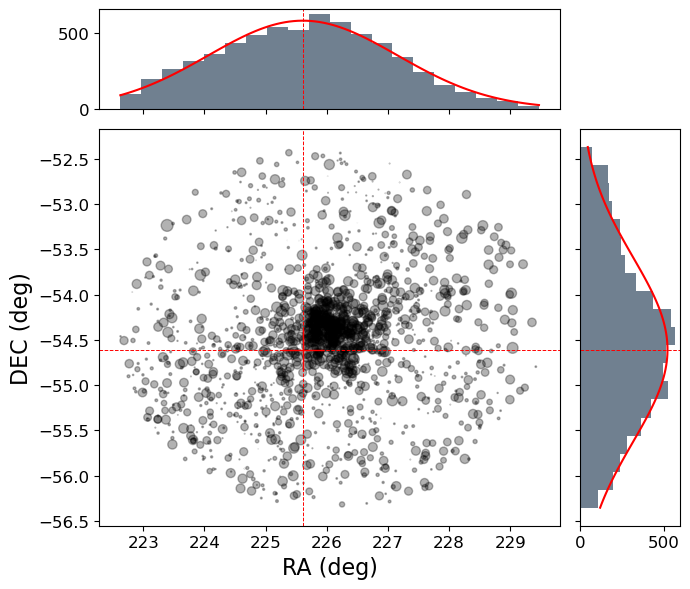

In [38]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(figsize=(7,6),tight_layout=True)

ax.scatter(population.RAJ2000, population.DEJ2000, color='k', s=(19.5-population.Gmag)*6, alpha=0.3)
ax.plot(params_ra[1], params_de[1], marker='+', color="r", markersize=30)
ax.axvline(params_ra[1],color='r',lw=0.7,ls='--')
ax.axhline(params_de[1],color='r',lw=0.7,ls='--')
ax.tick_params(axis='both', which='major', labelsize=12)

divider = make_axes_locatable(ax)
# below height and pad are in inches
ax_histx = divider.append_axes("top", 1, pad=0.2, sharex=ax)
ax_histy = divider.append_axes("right", 1, pad=0.2, sharey=ax)
ax_histx.hist(population.RAJ2000,color='slategrey', bins=20)
ax_histx.plot(x_ra,gaus_ra,color='r')
ax_histx.axvline(params_ra[1],color='r',lw=0.7,ls='--')
ax_histy.axhline(params_de[1],color='r',lw=0.7,ls='--')
ax_histy.hist(population.DEJ2000, color='slategrey', bins=20, orientation='horizontal')
ax_histy.plot(gaus_de,x_de,color='r')

# make some labels invisible
ax_histx.xaxis.set_tick_params(labelbottom=False)
ax_histx.yaxis.set_tick_params(labelsize=12)
ax_histy.yaxis.set_tick_params(labelleft=False)
ax_histy.xaxis.set_tick_params(labelsize=12)


ax.set_xlabel("RA (deg)", fontsize=16)
ax.set_ylabel("DEC (deg)", fontsize=16)

### PM

In [39]:
params_pmra, params_pmde, x_pmra, x_pmde, gaus_pmra, gaus_pmde = stat2var_gaus(data,"pmRA","pmDE",20,0)

In [40]:
print(f"pmRA = {params_pmra[1]:.4f}")
print(f"pmDE = {params_pmde[1]:.4f}")

pmRA = -6.6149
pmDE = -2.9040


Text(0, 0.5, 'pmde (mas/yr)')

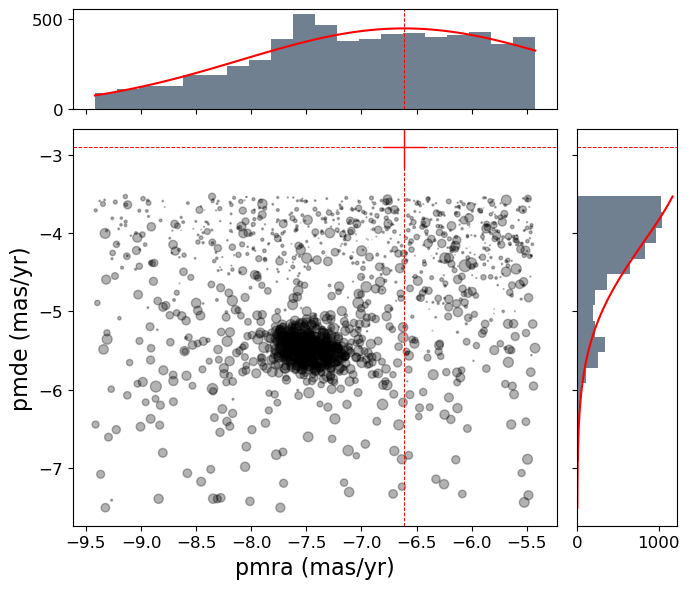

In [41]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(figsize=(7,6),tight_layout=True)

ax.scatter(population.pmRA,population.pmDE,color='k', s=(19.5-population.Gmag)*6, alpha=0.3)
ax.plot(params_pmra[1], params_pmde[1], marker='+', color="r", markersize=30)
ax.axvline(params_pmra[1],color='r',lw=0.7,ls='--')
ax.axhline(params_pmde[1],color='r',lw=0.7,ls='--')
ax.tick_params(axis='both', which='major', labelsize=12)

divider = make_axes_locatable(ax)
# below height and pad are in inches
ax_histx = divider.append_axes("top", 1, pad=0.2, sharex=ax)
ax_histy = divider.append_axes("right", 1, pad=0.2, sharey=ax)
ax_histx.hist(population.pmRA,color='slategrey', bins=20)
ax_histx.plot(x_pmra,gaus_pmra,color='r')
ax_histx.axvline(params_pmra[1],color='r',lw=0.7,ls='--')
ax_histy.axhline(params_pmde[1],color='r',lw=0.7,ls='--')
ax_histy.hist(population.pmDE,color='slategrey', bins=20, orientation='horizontal')
ax_histy.plot(gaus_pmde,x_pmde,color='r')

# make some labels invisible
ax_histx.xaxis.set_tick_params(labelbottom=False)
ax_histx.yaxis.set_tick_params(labelsize=12)
ax_histy.yaxis.set_tick_params(labelleft=False)
ax_histy.xaxis.set_tick_params(labelsize=12)

ax.set_xlabel("pmra (mas/yr)", fontsize=16)
ax.set_ylabel("pmde (mas/yr)", fontsize=16)

### Plx

In [42]:
params_plx, x_plx, gaus_plx = stat1var_gaus(data,"Plx_corr",20,10000)

In [43]:
print(f"Plx = {params_plx[1]:.4f}")

Plx = 115483.0769


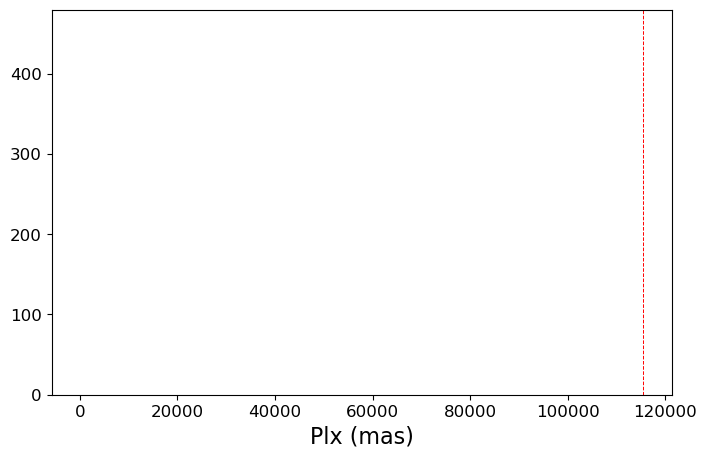

In [44]:
fig, ax = plt.subplots(figsize=(8,5))

ax.hist(population.Plx_corr,20, color="slategrey")
ax.axvline(params_plx[1],color='r',lw=0.7,ls='--')
ax.set_xlabel("Plx (mas)",fontsize=16)
ax.plot(x_plx, gaus_plx, 'r')

ax.tick_params(axis='both', which='major', labelsize=12)